In [1]:
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis
# from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [3]:
FEAT_DIR = os.path.join('C:\\Users\\Dell\\Desktop\\MaIA\\Spain\\CAD\\Project\\MelanomaChallenge', 
                        'features')

RESULTS_DIR = os.path.join('C:\\Users\\Dell\\Desktop\\MaIA\\Spain\\CAD',
                        'Results')

# Read features from the pipeline
features_file = 'featuresCh1Train1D'
test_file = 'featuresCh1TestD'


df_train = pd.read_csv(os.path.join(FEAT_DIR, features_file+'.csv'))
df_test = pd.read_csv(os.path.join(FEAT_DIR, test_file+'.csv'))

In [4]:
print(df_train.shape)
print(df_test.shape)

(14998, 423)
(3720, 423)


In [11]:
# Check the features file is correctly loadedd
df_train[df_train.name == 'name']

,name,label,rgb_mean_0,rgb_mean_1,rgb_mean_2,rgb_std0,rgb_std1,rgb_std2,rgb_skew0,rgb_skew1,...,lbp_49,lbp_50,lbp_51,lbp_52,lbp_53,lbp_54,lbp_55,lbp_56,lbp_57,lbp_58


In [6]:
# features_file = 'featuresCh1BTrain_nodup'
features_file = features_file + '_PRUEBA_AFTER_SUBMISSION'

In [6]:
features_file += '_sfm'

In [11]:
df_train = df_train.dropna(axis=0)
df_train = df_train.drop_duplicates()
len(df_train)

13447

In [10]:
X = df_train.iloc[:,2:]
y = df_train.label.values.astype(int)

X_test = df_test.iloc[:, 2:]
y_test = df_test.label.values.astype(int)

## Imbalancing Strategies for Multi Class

In [ ]:
from imblearn.over_sampling import SMOTE


oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X, y)
counter = Counter(y_res)
print(counter)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
counter = Counter(y_res)
print(counter)

In [ ]:
from imblearn.combine import SMOTEENN

sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X, y)
counter = Counter(y_res)
print(counter)

## Classification Results 

In [12]:
import os
import cv2
import random
import cv2
import numpy as np 
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

def fit_report(pipe, X_train, y_train, X_test, y_test, pipelineName='', classifierName='', balancingType = ''):
    
    print("*****************************************************")
    
    pipe.fit(X_train, y_train)

    pred = pipe.predict(X_test) 
    
    print(" ### Report ###")
    print(classification_report(y_test, pred))
    
    print(" ### score ###")
    print(pipe.score(X_test, y_test))

    print(" ### accuracy ###")
    acc = accuracy_score(y_test, pred)
    print(acc)

    print("### f1_score ###")
    f1 = f1_score(y_test, pred, average='weighted')
    print(f1) # 1 is best

    print("### kappa_score ###")
    kappa = cohen_kappa_score(y_test, pred)
    print(kappa)
    
    print("### confusion matrix ###")
    print(confusion_matrix(y_test, pred)) # diagonal stronger
    
    df_cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(df_cm, annot=True, fmt='d') # font size
    plt.savefig(os.path.join(RESULTS_DIR, f'confmat_{pipelineName}_{classifierName}_{balancingType}.png'), format='png')

    # Save the final model with its respective fold
    filename = f'model_{classifierName}_{pipelineName}_{balancingType}.pkl'
    pickle.dump(pipe, open(os.path.join(RESULTS_DIR, filename), 'wb'))
    print(f"Model {pipelineName} of {classifierName} was saved!")  
    
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

    return acc, f1, kappa


Searching for best hyperparameters
The best parameters for rf are {'criterion': 'gini', 'max_depth': 12, 'n_estimators': 900} with an accuracy of 0.7540
### RF ###
current pipeline
Pipeline(steps=[('scale', StandardScaler()),
                ('selector rfe',
                 RFE(estimator=RandomForestClassifier(n_jobs=-1,
                                                      random_state=42))),
                ('clf',
                 RandomForestClassifier(max_depth=12, n_estimators=900,
                                        n_jobs=-1, random_state=42))])
*****************************************************
 ### Report ###
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1492
           1       0.93      0.97      0.95      1484

    accuracy                           0.95      2976
   macro avg       0.95      0.95      0.95      2976
weighted avg       0.95      0.95      0.95      2976

 ### score ###
0.9495967741935484
 ###

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


The best parameters for mlp are {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 20), 'learning_rate': 'constant', 'solver': 'adam'} with an accuracy of 0.6801
### MLP ###
current pipeline
Pipeline(steps=[('scale', StandardScaler()),
                ('selector rfe',
                 RFE(estimator=RandomForestClassifier(n_jobs=-1,
                                                      random_state=42))),
                ('clf',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 20),
                               max_iter=150, random_state=1))])
*****************************************************


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


 ### Report ###
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1492
           1       0.96      0.95      0.95      1484

    accuracy                           0.95      2976
   macro avg       0.95      0.95      0.95      2976
weighted avg       0.95      0.95      0.95      2976

 ### score ###
0.9529569892473119
 ### accuracy ###
0.9529569892473119
### f1_score ###
0.9529534832036064
### kappa_score ###
0.905909558996224
### confusion matrix ###
[[1433   59]
 [  81 1403]]
Model featuresCh1Train1D_PRUEBA_AFTER_SUBMISSION of mlp was saved!
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The best parameters for xgb are {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 180} with an accuracy of 0.7688
### XGBOOST ###
current pipeline
Pipeline(steps=[('scale', StandardScaler()),
                ('selector rfe',
                 RFE(estimator=RandomForestClassifier(n_jobs=-1,
                                            

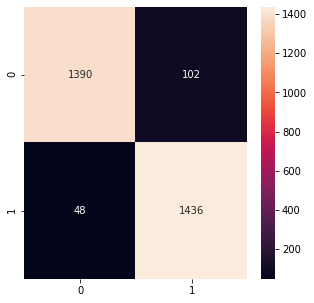

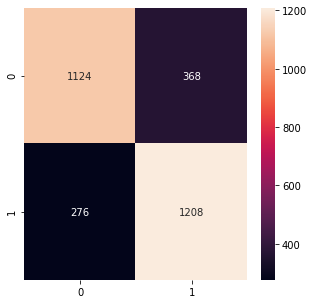

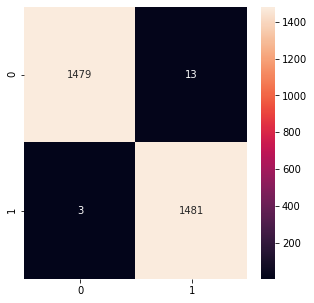

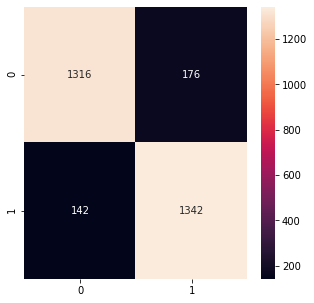

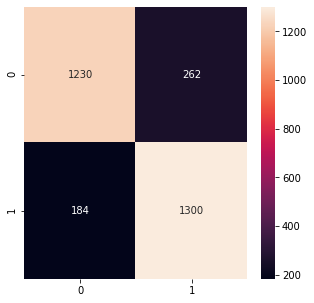

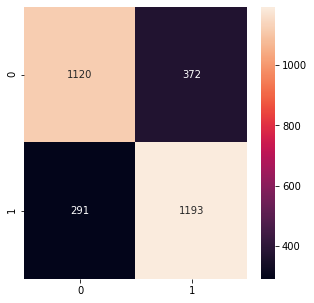

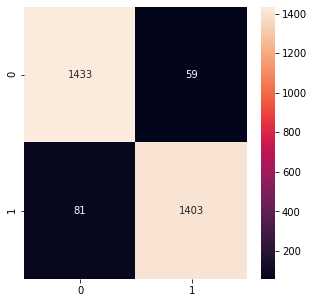

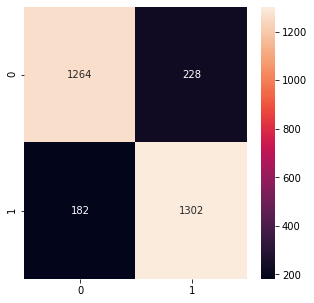

In [13]:
import os
import library
import pandas as pd
from sklearn import tree
from sklearn.pipeline import Pipeline
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif    

classifiers = [  "rf", "adaboost", "gradboost", "histgradboost", "knn", "lda", "mlp", 'xgboost']

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=1)

balancingType = ''

accs = []
f1_scores = []
kappas = []

for classifier in classifiers:
    
    # preprocessing options
    #('selectFromModel', SelectFromModel(RandomForestClassifier(random_state=42, n_jobs = -1)))
    #('selector rfe', RFE(RandomForestClassifier(random_state=42, n_jobs = -1))),
    #('reduce_dims', PCA(0.8)),
    #('mutual_info_classif, SelectKBest(mutual_info_classif, k=100)),
    
    # preprocessing steps
    pipe = [('scale', StandardScaler()),
            ('selector rfe', RFE(RandomForestClassifier(random_state=42, n_jobs = -1)))
           ]

    if classifier == "svm":
        clf, best_params = library.SVC_linear(X_val, y_val, cv=2)
        clf.set_params(**best_params)
        print("### SVM ###")
    
    elif classifier == "rf":
        clf, best_params = library.RandomForest(X_val, y_val, cv=2)
        clf.set_params(**best_params)
        print("### RF ###")
    
    elif classifier == "tree":
        clf = tree.DecisionTreeClassifier()
        print("### TREE ###")
    
    elif classifier == "adaboost":
        clf, best_params = library.AdaBoost(X_val, y_val)
        clf.set_params(**best_params)
        print("### ADABOOST ###")
    
    elif classifier == "gradboost":
        clf, best_params = library.GradientBoosting(X_val, y_val)
        clf.set_params(**best_params)
        print("### GRADBOOST ###")
    
    elif classifier == "knn":
        clf, best_params = library.knn(X_val, y_val)
        clf.set_params(**best_params)
        print("### KNN ###")
        
    elif classifier == "histgradboost":
        clf = HistGradientBoostingClassifier()
        print("### HISTGRADBOOST ###")
        
    elif classifier == "lda":
        clf = LinearDiscriminantAnalysis()
        print("### LDA ###")

    elif classifier == "xgboost":
        clf, best_params = library.xgboost_clf(X_val.astype('float'), y_val)
        clf.set_params(**best_params)
        print("### XGBOOST ###")        
    
    elif classifier == "mlp":
        clf, best_params = library.mlp_classifier(X_val, y_val)
        clf.set_params(**best_params)
        print("### MLP ###")        


    # add classifier 
    pipe.append(tuple(('clf', clf)))
    
    steps = Pipeline(pipe)
    
    # pipeline shape
    print("current pipeline")
    print(steps)
    
    acc, f1, kappa = fit_report(steps, X, y, X_test, y_test, features_file, classifier, balancingType)
    accs.append(acc)
    f1_scores.append(f1)
    kappas.append(kappa)

In [ ]:
df_results = pd.DataFrame({'Classifier': classifiers, 'Accuracy': accs, 'F1-score': f1_scores, 'Kappa-score': kappas})
df_results.to_csv(os.path.join(RESULTS_DIR, f'Results_{features_file}_{balancingType}.csv'), mode='a', index=False)